In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# create path
path = r'C:\Users\Anna\Desktop\Data Analytics\Achievment 6\Prepared data'

In [3]:
df_data = pd.read_csv(os.path.join(path,'Used Cars Cleaned.CSV'))
df_data.head()

,Unnamed: 0,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1428,1475,Maruti,1994,45000,60000,East,Massachusetts,Braintree,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
1,1422,1469,Maruti,1999,52000,100000,Central,Kansas,Kansas City,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
2,171,178,Maruti,1999,40000,40000,East,District of Columbia,Washington,Petrol,Individual,Manual,Second_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
3,970,1000,Maruti,1999,55000,60000,Central,Michigan,Detroit,Petrol,Individual,Manual,Second_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
4,1828,1883,Maruti,2000,110000,70000,Central,Indiana,Lawrence,Petrol,Individual,Manual,Fourth_Above_Owner,17.3,993,60.0,78Nm@ 4500rpm,5,Y


In [7]:
# Drop the redundant columns
df_data = df_data.drop(columns=['Unnamed: 0'])

In [11]:
# changing the column State or Province to State
df_sales = df_data.rename(columns = { 'State or Province' : 'State'})

In [15]:
df = df_sales[['selling_price','km_driven','engine','seats']]
df

,selling_price,km_driven,engine,seats
0,45000,60000,796,4
1,52000,100000,796,4
2,40000,40000,796,4
3,55000,60000,796,4
4,110000,70000,993,5
...,...,...,...,...
1995,475000,13000,998,5
1996,390000,6000,998,5
1997,630000,5000,1197,5
1998,480000,44665,1198,6


### 02. Standadizing the data

In [16]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-0.71303787 -0.15513059 -1.29536681 -1.482361  ]
 [-0.70513243  0.55750406 -1.29536681 -1.482361  ]
 [-0.7186846  -0.51144791 -1.29536681 -1.482361  ]
 ...
 [-0.05236958 -1.13500323 -0.52489784 -0.44791508]
 [-0.2217717  -0.4283369  -0.52297647  0.58653084]
 [ 1.43836912 -1.17597972  0.21482923 -0.44791508]]


In [17]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

      selling_price  km_driven    engine     seats
0         -0.713038  -0.155131 -1.295367 -1.482361
1         -0.705132   0.557504 -1.295367 -1.482361
2         -0.718685  -0.511448 -1.295367 -1.482361
3         -0.701744  -0.155131 -1.295367 -1.482361
4         -0.639630   0.023028 -0.916857 -0.447915
...             ...        ...       ...       ...
1995      -0.227418  -0.992476 -0.907250 -0.447915
1996      -0.323413  -1.117187 -0.907250 -0.447915
1997      -0.052370  -1.135003 -0.524898 -0.447915
1998      -0.221772  -0.428337 -0.522976  0.586531
1999       1.438369  -1.175980  0.214829 -0.447915

[2000 rows x 4 columns]


### 3. The elbow technique

In [24]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8000.0000000000055,
 -5102.381571637618,
 -3464.912518826777,
 -2907.467494361564,
 -2285.943842029964,
 -1904.5413006072727,
 -1653.626195758349,
 -1487.6987529088294,
 -1332.6867554919406]

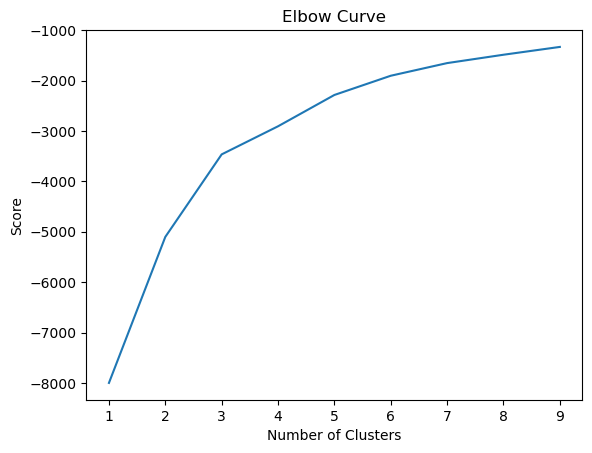

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

After 5, there is a noticeable straightening of the x-axis.
As a result, the optimal number of clusters for your situation is 5. 

### 04. k-means clustering

In [32]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [33]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [34]:
df['clusters'] = kmeans.fit_predict(df)
df.head()

,selling_price,km_driven,engine,seats,clusters
0,-0.713038,-0.155131,-1.295367,-1.482361,1
1,-0.705132,0.557504,-1.295367,-1.482361,3
2,-0.718685,-0.511448,-1.295367,-1.482361,1
3,-0.701744,-0.155131,-1.295367,-1.482361,1
4,-0.639630,0.023028,-0.916857,-0.447915,1


In [35]:
df['clusters'].value_counts()

1    952
3    555
2    372
0    120
4      1
Name: clusters, dtype: int64

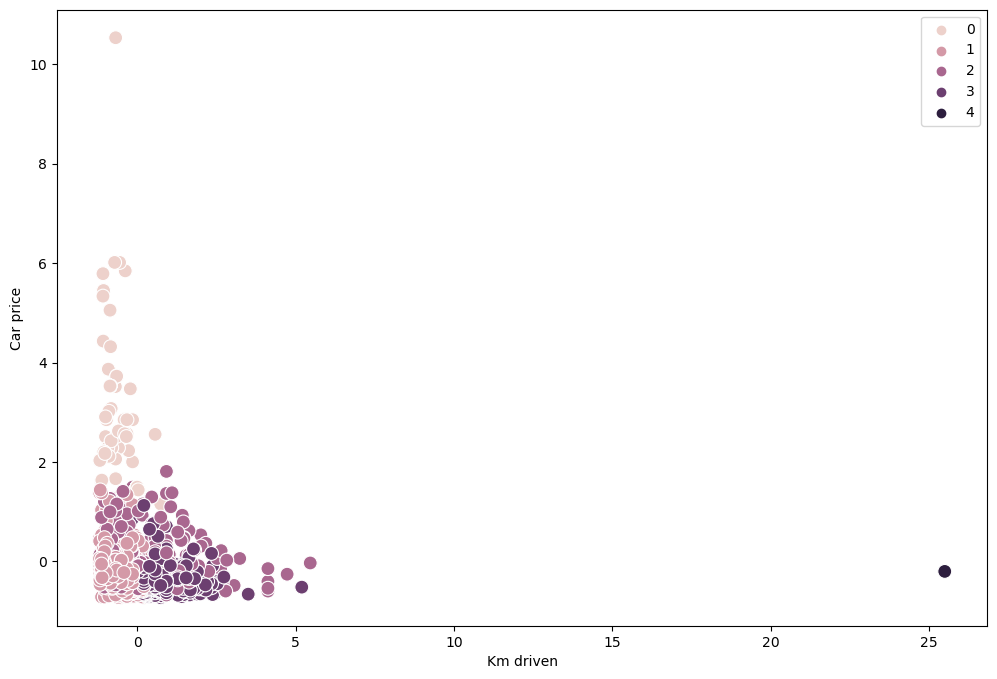

In [36]:
# Plot the clusters for the "selling price" and "km driven" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['km_driven'], y=df['selling_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Km driven') # Label x-axis.
plt.ylabel('Car price') # Label y-axis.
plt.show()

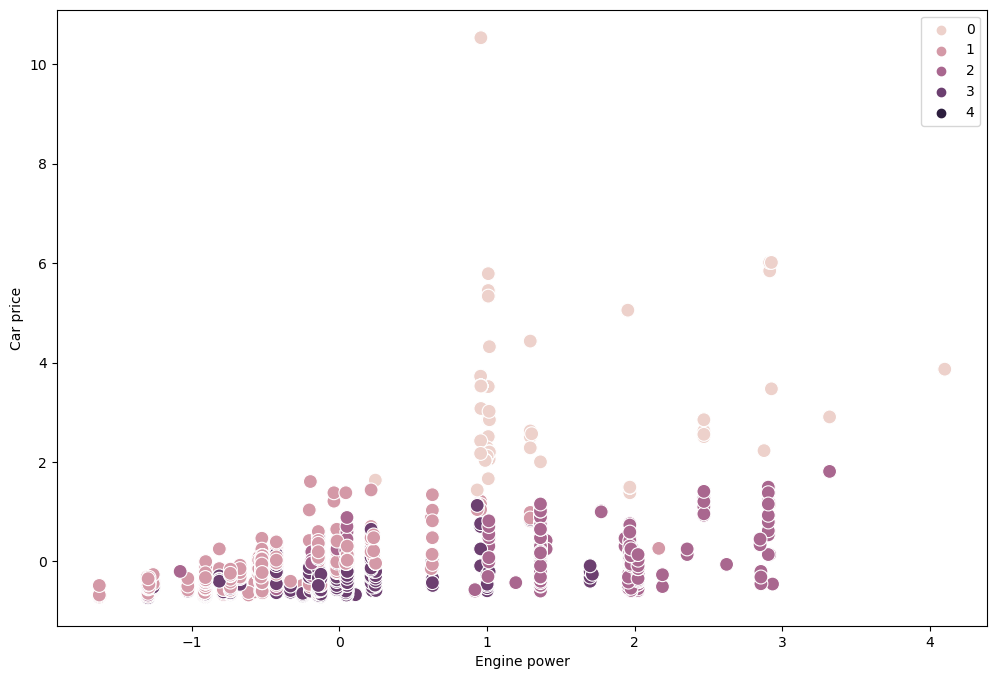

In [37]:
# Plot the clusters for the "selling price" and "engine" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['engine'], y=df['selling_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Engine power') # Label x-axis.
plt.ylabel('Car price') # Label y-axis.
plt.show()

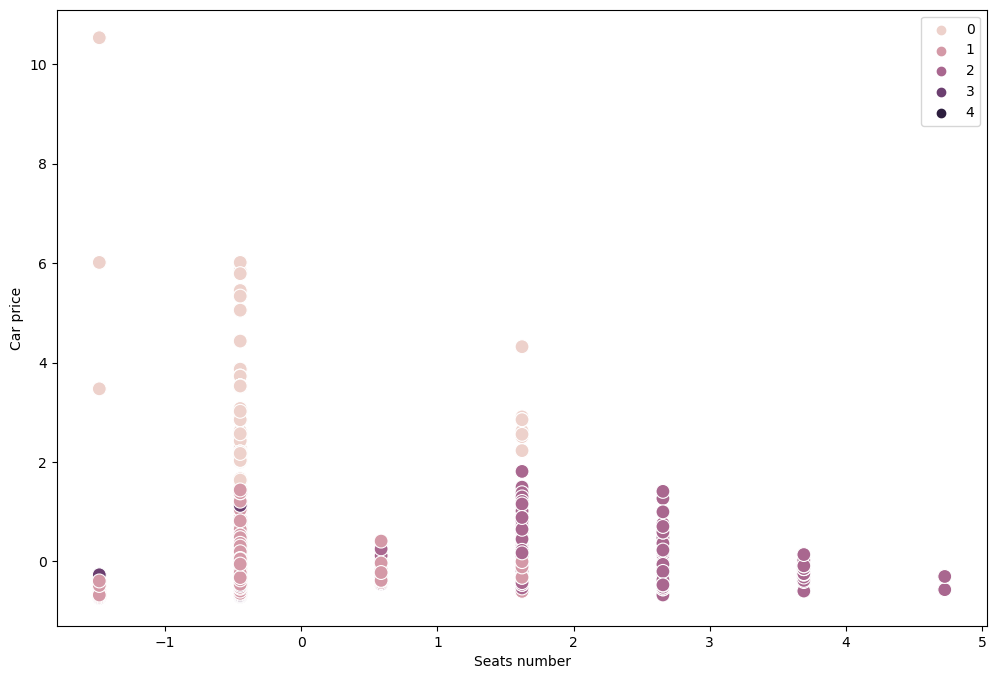

In [38]:
# Plot the clusters for the "selling price" and "seats" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['seats'], y=df['selling_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Seats number') # Label x-axis.
plt.ylabel('Car price') # Label y-axis.
plt.show()

The three graphs do not wholly provide useful insides or give a thorough of understanding of the relationship between the cost of the car? km driven and either the Engine Power or Seat number.
This implies that there are other important factors that are not included in this analysis, and that all factors together will be a determinant of the final price. 

In [39]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'dent purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'whitish purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'whitish pink'

In [40]:
df.groupby('cluster').agg({'km_driven':['mean', 'median'], 
                         'selling_price':['mean', 'median'], 
                         'engine':['mean', 'median'],
                          'seats':['mean', 'median']})

km_driven            selling_price              engine  \
                     mean     median          mean    median      mean   
cluster                                                                  
dark purple     25.499717  25.499717     -0.199185 -0.199185  1.361887   
dent purple      0.673046   0.557504     -0.387220 -0.425054 -0.231486   
purple           0.526441   0.397161     -0.014913 -0.086250  1.258918   
whitish pink    -0.733762  -0.867765      3.395717  2.850053  1.470300   
whitish purple  -0.532379  -0.511448     -0.196252 -0.238712 -0.543740   

                             seats            
                  median      mean    median  
cluster                                       
dark purple     1.361887  1.620977  1.620977  
dent purple    -0.142545 -0.453507 -0.447915  
purple          1.361887  1.929642  1.620977  
whitish pink    1.016040 -0.301369 -0.447915  
whitish purple -0.524898 -0.453348 -0.447915

As it was distinguished the correltion between considered veriables is not significantly strong. Nevertheless, it could be observed, that there are some increase in prices within cluster 0 and 1. 